In [2]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [3]:
%matplotlib inline

In [8]:
m = n = l = 3 # L of square grid

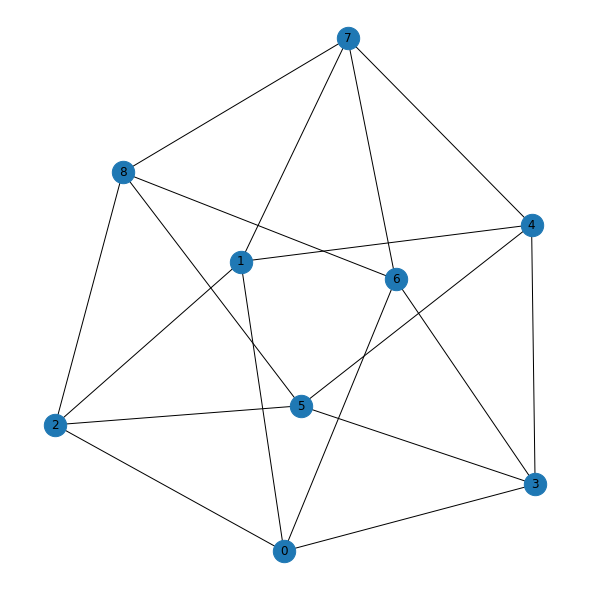

In [9]:
import imp 

import graph_gen
imp.reload(graph_gen)

periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

#H = np.random.random(N)
H=np.zeros(N)

betas_fast = np.arange(0.1,2.1,1e-1)

j_start = 1
j = graph_gen.fixed_value(j_start)
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [10]:
tree = model.model(N, H, J, J_interaction)

In [11]:
import solvers
imp.reload(solvers)
res_ex = solvers.exact_sol(tree, betas_fast)

beta: 0.1, Fe: -7.039 Energy: -0.225 M: 0.0 S: 0.681
beta: 0.2, Fe: -3.705 Energy: -0.538 M: 0.0 S: 0.633
beta: 0.3, Fe: -2.721 Energy: -0.988 M: 0.0 S: 0.52
beta: 0.4, Fe: -2.349 Energy: -1.46 M: 0.0 S: 0.355
beta: 0.5, Fe: -2.206 Energy: -1.77 M: 0.0 S: 0.219
beta: 0.6, Fe: -2.146 Energy: -1.91 M: 0.0 S: 0.144
beta: 0.7, Fe: -2.116 Energy: -1.96 M: 0.0 S: 0.108
beta: 0.8, Fe: -2.099 Energy: -1.98 M: 0.0 S: 0.0914
beta: 0.9, Fe: -2.086 Energy: -1.99 M: 0.0 S: 0.0838
beta: 1.0, Fe: -2.077 Energy: -2.0 M: 0.0 S: 0.0803
beta: 1.1, Fe: -2.070 Energy: -2.0 M: 3e-16 S: 0.0786
beta: 1.2, Fe: -2.064 Energy: -2.0 M: 0.0 S: 0.0778
beta: 1.3, Fe: -2.059 Energy: -2.0 M: 3.79e-16 S: 0.0774
beta: 1.4, Fe: -2.055 Energy: -2.0 M: 0.0 S: 0.0772
beta: 1.5, Fe: -2.051 Energy: -2.0 M: 0.0 S: 0.0771
beta: 1.6, Fe: -2.048 Energy: -2.0 M: 0.0 S: 0.0771
beta: 1.7, Fe: -2.045 Energy: -2.0 M: 2.01e-16 S: 0.077
beta: 1.8, Fe: -2.043 Energy: -2.0 M: 0.0 S: 0.077
beta: 1.9, Fe: -2.041 Energy: -2.0 M: 0.0 S: 0.077

In [12]:
import solvers
imp.reload(solvers)

res_nn = solvers.nn_sol(tree, betas_fast, max_step=1000, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -7.039 std_fe: 4.02E-02 M: 0.010 S: 0.683 E: -0.211: 0.0216, B1 = -0.002
fe: -3.699 std_fe: 8.75E-02 M: 0.008 S: 0.640 E: -0.501: 0.0302, B1 = -0.004
fe: -2.702 std_fe: 1.11E-01 M: 0.006 S: 0.529 E: -0.937: 0.0358, B1 = -0.004
fe: -2.332 std_fe: 7.88E-02 M: 0.007 S: 0.339 E: -1.485: 0.0336, B1 = 0.0029
fe: -2.198 std_fe: 4.90E-02 M: 0.005 S: 0.203 E: -1.792: 0.0191, B1 = 0.0103
fe: -2.142 std_fe: 2.31E-02 M: 0.011 S: 0.131 E: -1.924: 0.00756, B1 = 0.010
fe: -2.115 std_fe: 1.60E-02 M: 0.021 S: 0.102 E: -1.969: 0.0307, B1 = -0.004
fe: -2.098 std_fe: 6.27E-03 M: 0.012 S: 0.087 E: -1.989 0.0398, B1 = -0.0010
fe: -2.086 std_fe: 3.24E-03 M: 0.001 S: 0.081 E: -1.996 0.0196, B1 = 0.001002
fe: -2.077 std_fe: 6.10E-03 M: 0.018 S: 0.080 E: -1.9970.00978, B1 = -0.002
fe: -2.070 std_fe: 3.16E-03 M: 0.005 S: 0.079 E: -1.9980.07, B1 = 0.0010022
fe: -2.064 std_fe: 1.28E-02 M: 0.017 S: 0.080 E: -1.997.01, B1 = -0.009
fe: -2.059 std_fe: 1.28E-02 M: 0.006 S: 0.079 E: -1.998.014, B1 = 0.0081
fe: -2.05

In [13]:
res_nn_z2 = solvers.nn_sol(tree, betas_fast, max_step=1000,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2["name"]="nn_z2"

fe: -7.039 std_fe: 3.08E-02 M: 0.009 S: 0.681 E: -0.229: 0.0249, B1 = 0.058
fe: -3.705 std_fe: 1.76E-02 M: 0.008 S: 0.634 E: -0.535: 0.0262, B1 = 0.421
fe: -2.721 std_fe: 2.14E-02 M: 0.008 S: 0.522 E: -0.979: 0.0191, B1 = 1.048
fe: -2.348 std_fe: 1.77E-02 M: 0.004 S: 0.354 E: -1.463: 0.0389, B1 = 1.983
fe: -2.205 std_fe: 1.06E-02 M: 0.006 S: 0.218 E: -1.768: 0.0164, B1 = 3.086
fe: -2.146 std_fe: 4.26E-03 M: 0.002 S: 0.142 E: -1.909: 0.0191, B1 = 4.167
fe: -2.116 std_fe: 2.26E-03 M: 0.005 S: 0.107 E: -1.964: 0.0124, B1 = 5.184
fe: -2.099 std_fe: 3.26E-04 M: 0.009 S: 0.091 E: -1.984 0.0202, B1 = 6.13122
fe: -2.086 std_fe: 7.44E-04 M: 0.004 S: 0.084 E: -1.994 0.0669, B1 = 6.94550
fe: -2.077 std_fe: 3.50E-03 M: 0.011 S: 0.082 E: -1.9960.074, B1 = 7.18982
fe: -2.070 std_fe: 4.40E-03 M: 0.002 S: 0.079 E: -1.9980.012, B1 = 7.500188
fe: -2.064 std_fe: 7.30E-03 M: 0.010 S: 0.080 E: -1.998.024, B1 = 7.5170
fe: -2.059 std_fe: 1.14E-02 M: 0.007 S: 0.079 E: -1.998.016, B1 = 7.55043
fe: -2.055 std_f

In [20]:
res_nn_is = solvers.nn_sol(tree, betas_fast, max_step=1000,
                           bias = True, z2 = False, x_hat_clip = False, i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -7.039 std_fe: 2.54E-05 M: 0.022 S: 0.681 E: -0.225: 0.0249, B1 = -0.000
fe: -3.706 std_fe: 5.87E-05 M: -0.006 S: 0.630 E: -0.554 0.0211, B1 = 0.0033
fe: -2.722 std_fe: 1.05E-04 M: 0.103 S: 0.524 E: -0.976: 0.0209, B1 = -0.016
fe: -2.350 std_fe: 1.91E-04 M: -0.138 S: 0.359 E: -1.453 0.0138, B1 = 0.0087
fe: -2.205 std_fe: 4.19E-04 M: 0.006 S: 0.222 E: -1.762: 0.026, B1 = 0.00232
fe: -2.144 std_fe: 3.64E-05 M: 0.070 S: 0.138 E: -1.914: 0.0267, B1 = 0.0021
fe: -2.115 std_fe: 3.01E-05 M: 0.039 S: 0.104 E: -1.966: 0.0144, B1 = -0.003
fe: -2.098 std_fe: 1.13E-05 M: -0.113 S: 0.088 E: -1.988 0.0351, B1 = 0.00131
fe: -2.086 std_fe: 6.22E-06 M: 0.078 S: 0.083 E: -1.994 0.018, B1 = -0.001023
fe: -2.077 std_fe: 3.75E-06 M: 0.028 S: 0.079 E: -1.9980.026, B1 = -0.00000
fe: -2.070 std_fe: 4.53E-06 M: -0.067 S: 0.078 E: -1.999.042, B1 = -0.0031
fe: -2.064 std_fe: 8.00E-06 M: -0.010 S: 0.078 E: -1.999.004, B1 = -0.00002
fe: -2.059 std_fe: 7.80E-06 M: 0.083 S: 0.077 E: -2.000.0, B1 = 0.009
fe: -2.0

In [14]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(tree, betas_fast, val_rand=0.1)
res_bp["name"]="bp"

fe: -7.031, ener: -0.199, M: 0.000, iter 8
fe: -3.664, ener: -0.395, M: 0.000, iter 13
fe: -2.606, ener: -0.583, M: 0.000, iter 45
fe: -2.165, ener: -1.315, M: 0.736, iter 37
fe: -2.050, ener: -1.768, M: 0.929, iter 13
fe: -2.017, ener: -1.912, M: 0.975, iter 9
fe: -2.006, ener: -1.964, M: 0.990, iter 7
fe: -2.002, ener: -1.985, M: 0.996, iter 6
fe: -2.001, ener: -1.994, M: 0.998, iter 5
fe: -2.000, ener: -1.997, M: 0.999, iter 5
fe: -2.000, ener: -1.999, M: 1.000, iter 5
fe: -2.000, ener: -1.999, M: 1.000, iter 5
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 3
fe: -2.000, ener: -2.000, M: 1.000, iter 3


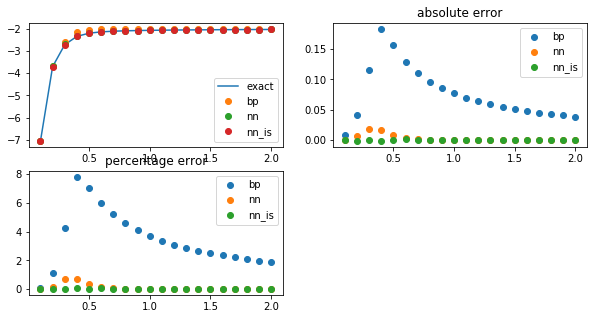

In [21]:
%matplotlib inline
import imp
imp.reload(solvers)
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
#plt.ylim(-0.001,0.11)
plt.show()

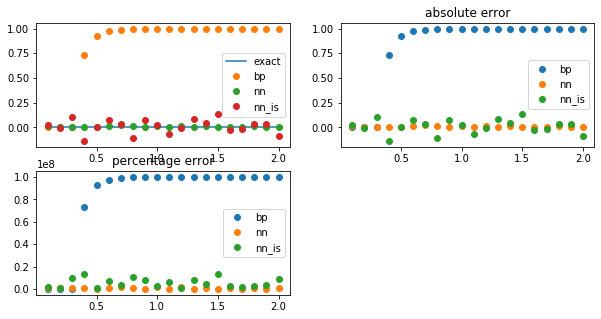

In [22]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is])
plt.show()

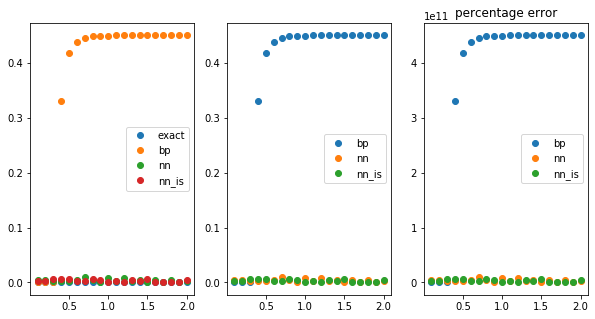

In [23]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
plt.show()

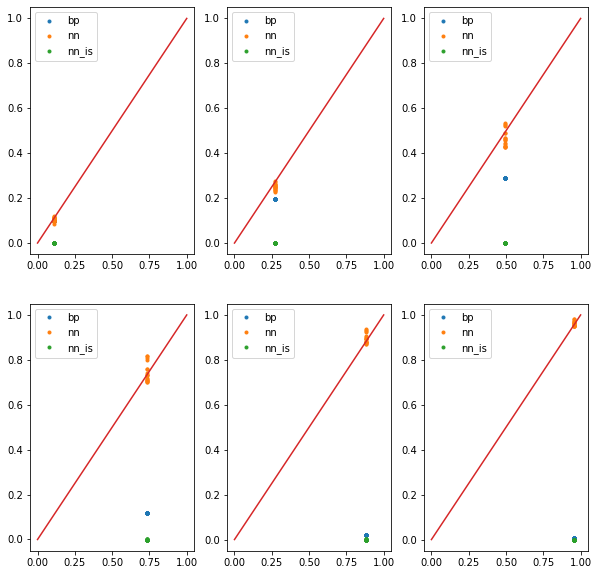

In [24]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas_fast[0:6], res_ex, [res_bp, res_nn, res_nn_is], J_interaction)
plt.show()